In [1]:
#!/usr/bin/env python
# coding: utf-8

# # IT540 Assignment 3: Predicting Chess Game Outcomes
#
# **Author:** [Your Name]
# **Date:** 2025-06-23
#



In [2]:

"""
Assignment 3 - Predicting Chess Game Outcomes
Author: [Your Name]
Course: IT540
Date: 2025-06-23



This script loads the sample chess games dataset, builds baseline and tuned neural network
models for classification, and saves results and model files.
"""



'\nAssignment 3 - Predicting Chess Game Outcomes\nAuthor: [Your Name]\nCourse: IT540\nDate: 2025-06-23\n\n\n\nThis script loads the sample chess games dataset, builds baseline and tuned neural network \nmodels for classification, and saves results and model files.\n'

In [15]:

pip install tensorflow

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("✅ GPU is available and will be used.")
    except Exception as e:
        print("⚠️ GPU setup failed:", e)
else:
    print("❌ No GPU found. Running on CPU.")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop




✅ GPU is available and will be used.


In [20]:

# 1. Data Loading and Exploration
df = pd.read_csv('matmob_data_sample.csv')
print('Data shape:', df.shape)
print('Sample row:\n', df.iloc[0])
print('\nResult distribution:\n', df['result'].value_counts())




Data shape: (100000, 16)
Sample row:
 w.mat.mean                                                 28.166667
w.mat.sd                                                    8.850414
b.mat.mean                                                 28.135417
b.mat.sd                                                    9.671031
w.mob.mean                                                   39.3125
w.mob.sd                                                   12.951885
b.mob.mean                                                    27.125
b.mob.sd                                                   11.296064
result                                                           1-0
valid.games.row                                              1343406
w.mat.vector       39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38...
b.mat.vector       39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38...
w.mob.vector       20, 28, 30, 32, 30, 40, 40, 45, 49, 47, 49, 51...
b.mob.vector       20, 22, 28, 34, 34, 35, 31, 32, 33, 30, 30, 28

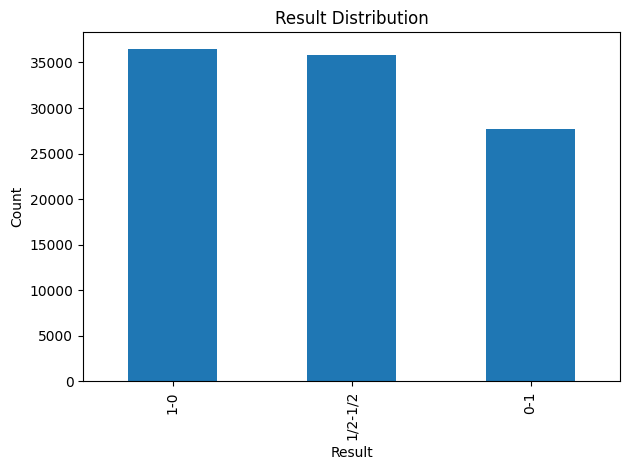

In [21]:

# Bar chart of result distribution
counts = df['result'].value_counts()
counts.plot(kind='bar')
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('result_distribution.png')
plt.show()




In [22]:

# 2. Data Preparation
cols = ['w.mat.mean','b.mat.mean','w.mob.mean','b.mob.mean','half.moves','result']
df2 = df[cols].copy()




In [23]:

# Encode result
mapping = {'0-1': 0, '1-0': 1, '1/2-1/2': 2}
df2['result'] = df2['result'].map(mapping)




In [24]:

# Split predictors and target
X = df2.drop('result', axis=1).values
y = df2['result'].values




In [25]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [26]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)




In [27]:

# Helper to plot history
def plot_history(history, filename):
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()




In [28]:

# 3. Baseline Neural Network Model
baseline_model = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
baseline_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3794 - loss: 1.1077 - val_accuracy: 0.4547 - val_loss: 1.0534
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4674 - loss: 1.0462 - val_accuracy: 0.4987 - val_loss: 1.0233
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5040 - loss: 1.0183 - val_accuracy: 0.5169 - val_loss: 1.0024
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5155 - loss: 0.9976 - val_accuracy: 0.5204 - val_loss: 0.9864
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5231 - loss: 0.9843 - val_accuracy: 0.5319 - val_loss: 0.9771
Epoch 6/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5264 - loss: 0.9770 - val_accuracy: 0.5305 - val_loss: 0.9701
Epoch 7/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5311 - loss: 0.9679 - val_accuracy: 0.5301 - val_loss: 0.9658
Epoch 8/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5288 - loss: 0.9661 - val_accu

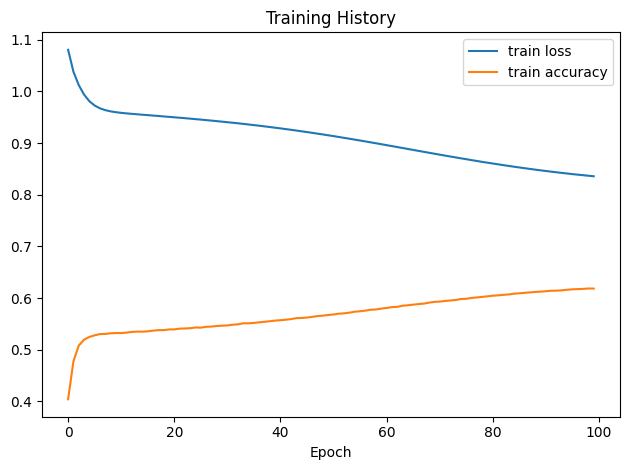

In [29]:

history_baseline = baseline_model.fit(
    X_train, y_train, epochs=100, batch_size=128, validation_split=0.1
)
baseline_loss, baseline_acc = baseline_model.evaluate(X_test, y_test)
print(f'Baseline Test Accuracy: {baseline_acc:.4f}')
plot_history(history_baseline, 'baseline_history.png')




In [30]:

# 4. Hyperparameter Tuning via Manual Grid Search
configs = [
    {'units': 30, 'activation': 'relu',    'optimizer': 'SGD',     'lr': 0.01,   'batch_size': 64,  'epochs': 50},
    {'units': 50, 'activation': 'sigmoid', 'optimizer': 'SGD',     'lr': 0.01,   'batch_size': 128, 'epochs': 100},
    {'units': 50, 'activation': 'relu',    'optimizer': 'Adam',    'lr': 0.001,  'batch_size': 64,  'epochs': 100},
    {'units': 100,'activation': 'tanh',    'optimizer': 'RMSprop', 'lr': 0.001,  'batch_size': 128, 'epochs': 50},
    {'units': 100,'activation': 'relu',    'optimizer': 'SGD',     'lr': 0.1,    'batch_size': 32,  'epochs': 100},
    {'units': 30, 'activation': 'tanh',    'optimizer': 'Adam',    'lr': 0.01,   'batch_size': 32,  'epochs': 50},
    {'units': 75, 'activation': 'relu',    'optimizer': 'RMSprop', 'lr': 0.0005, 'batch_size': 64,  'epochs': 75},
    {'units': 60, 'activation': 'sigmoid', 'optimizer': 'Adam',    'lr': 0.005,  'batch_size': 128, 'epochs': 100},
]




In [ ]:

config_results = []
for cfg in configs:
    # Select optimizer
    if cfg['optimizer'] == 'SGD':
        opt = SGD(learning_rate=cfg['lr'])
    elif cfg['optimizer'] == 'Adam':
        opt = Adam(learning_rate=cfg['lr'])
    else:
        opt = RMSprop(learning_rate=cfg['lr'])
    # Build model
    model = Sequential([
        Dense(cfg['units'], activation=cfg['activation'], input_shape=(X_train.shape[1],)),
        Dense(3, activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    # Train
    history = model.fit(
        X_train, y_train,
        epochs=cfg['epochs'],
        batch_size=cfg['batch_size'],
        validation_split=0.1,
        verbose=0
    )
    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    config_results.append((cfg, acc))
    print(f"Config {cfg} -> Test Accuracy: {acc:.4f}")




Config {'units': 30, 'activation': 'relu', 'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 64, 'epochs': 50} -> Test Accuracy: 0.6311
Config {'units': 50, 'activation': 'sigmoid', 'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 128, 'epochs': 100} -> Test Accuracy: 0.6092


In [ ]:

# Identify best configuration
best_cfg, best_acc = max(config_results, key=lambda x: x[1])
print(f"Best Config: {best_cfg} with Accuracy: {best_acc:.4f}")




In [ ]:

# 5. Improved Model with Best Configuration
if best_cfg['optimizer'] == 'SGD':
    opt = SGD(learning_rate=best_cfg['lr'])
elif best_cfg['optimizer'] == 'Adam':
    opt = Adam(learning_rate=best_cfg['lr'])
else:
    opt = RMSprop(learning_rate=best_cfg['lr'])




In [ ]:

imp_model = Sequential([
    Dense(best_cfg['units'], activation=best_cfg['activation'], input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
imp_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
history_imp = imp_model.fit(
    X_train, y_train,
    epochs=best_cfg['epochs'],
    batch_size=best_cfg['batch_size'],
    validation_split=0.1
)
imp_loss, imp_acc = imp_model.evaluate(X_test, y_test)
print(f'Improved Model Test Accuracy: {imp_acc:.4f}')
plot_history(history_imp, 'improved_history.png')




In [ ]:

print(f"Accuracy Comparison -> Baseline: {baseline_acc:.4f}, Improved: {imp_acc:.4f}")




In [ ]:

# Save models
baseline_model.save('baseline_model.h5')
imp_model.save('improved_model.h5')




In [ ]:

# Save final results to a CSV
results_df = pd.DataFrame([
    {"model": "baseline", "accuracy": baseline_acc},
    {"model": "improved", "accuracy": imp_acc}
])
results_df.to_csv('model_comparison.csv', index=False)




In [ ]:

print("Script execution complete. Models and figures saved.")

